In [70]:
# Notch Filter, 60 Hz

from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

In [71]:
# Test Signal

fs = 160  # Sample frequency (Hz)

f1 = 5  
f2 = 10  
f3 = 15  
f4 = 20  
fn = 60  
f5 = 70 

A1 = 1
A2 = 0.5
A3 = 0.8
An = 0.5
A4 = 0.4
A5 = 0.3
 
T = 8 # signal length in seconds

Ts = 1/fs # sampling time

N = fs*T # siganl length in points

    
    
# Set time vector
t = np.linspace(0, T - Ts, N)


# Generate the signal containing f1, f2 and f3
x_signal = A1*np.sin(2*np.pi*f1*t) + A2*np.sin(2*np.pi*f2*t) + A3*np.sin(2*np.pi*f3*t)+  A4*np.sin(2*np.pi*f4*t) + A5*np.sin(2*np.pi*f3*t) + An*np.sin(2*np.pi*fn*t)


In [72]:
# Filter Notch Design
fs = 160  # Sample frequency (Hz)
f0 = 60.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor, tipical 1-100, higher values sharps the reject band 

# IIR notch filter using signal.iirnotch
b, a = signal.iirnotch(f0, Q, fs)
 
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b, a, fs=fs)

In [73]:
# Apply notch filter to signal using signal.filtfilt
signal_filtered = signal.filtfilt(b, a, x_signal)

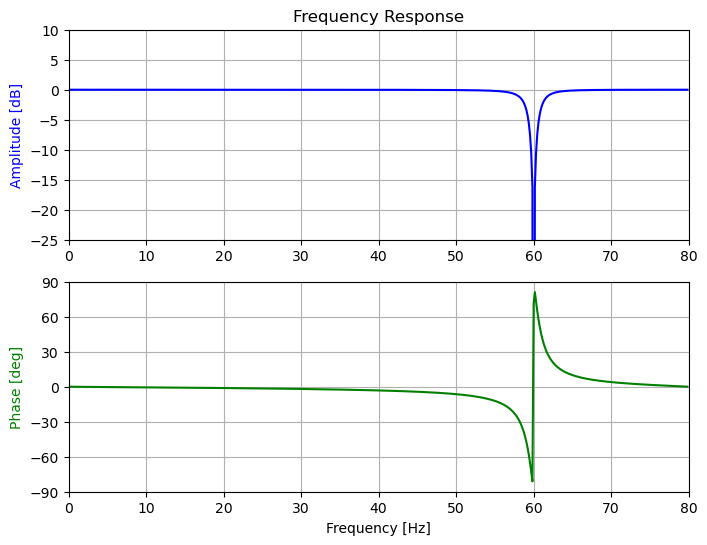

In [74]:
# Visualize Notch Filter Response
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq, 20*np.log10(abs(h)), color='blue')
ax[0].set_title("Frequency Response")
ax[0].set_ylabel("Amplitude [dB]", color='blue')
ax[0].set_xlim([0, 80])
ax[0].set_ylim([-25, 10])
ax[0].grid(True)
ax[1].plot(freq, np.unwrap(np.angle(h))*180/np.pi, color='green')
ax[1].set_ylabel("Phase [deg]", color='green')
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_xlim([0, 80])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid(True)
plt.show()

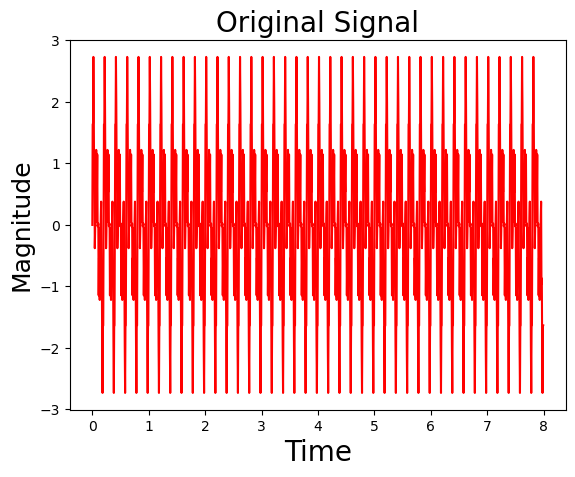

In [75]:
# Plot Original signal of notch filter
plt.plot(t, x_signal,  color='r')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Original Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Original Signal')

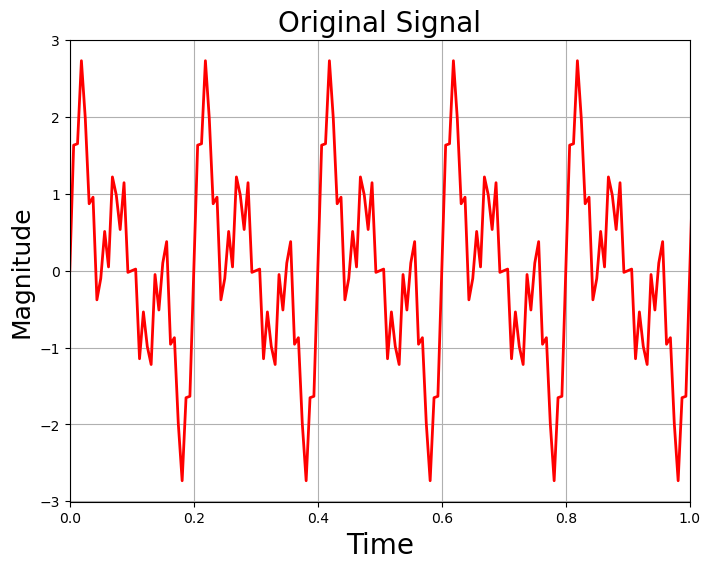

In [76]:
fig = plt.figure(figsize=(8, 6))
plt.plot(t, x_signal, color='r', linewidth=2)
plt.grid()
plt.xlim([0, 1])
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Original Signal', fontsize=20)

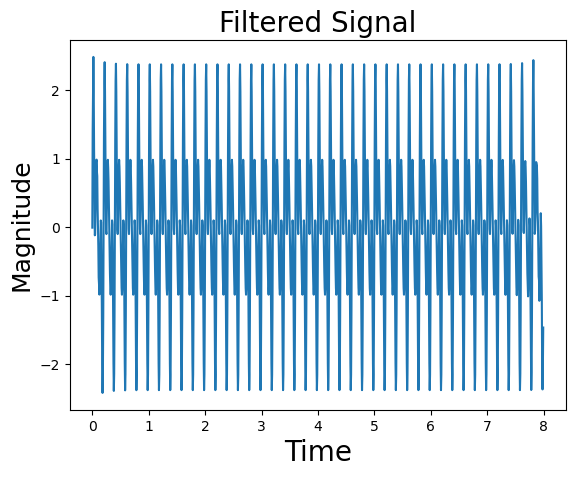

In [77]:


# Plot output signal of notch filter
plt.plot(t, signal_filtered)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

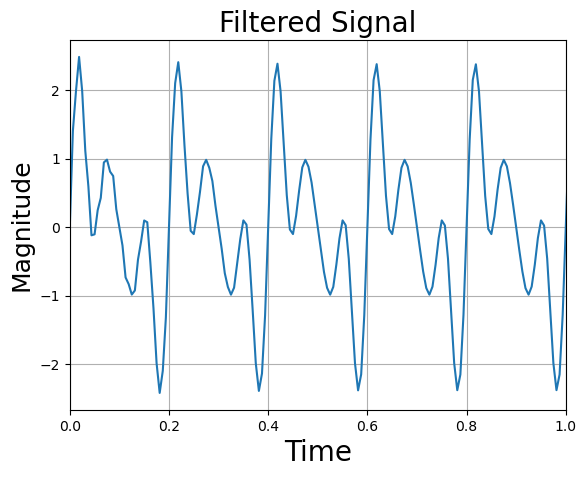

In [78]:
plt.plot(t, signal_filtered)
plt.xlabel('Time', fontsize=20)
plt.xlim([0, 1])
plt.ylabel('Magnitude', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
plt.grid()
fig.tight_layout()
plt.show()

In [79]:
f = np.arange(0, fs, fs/len(x_signal))

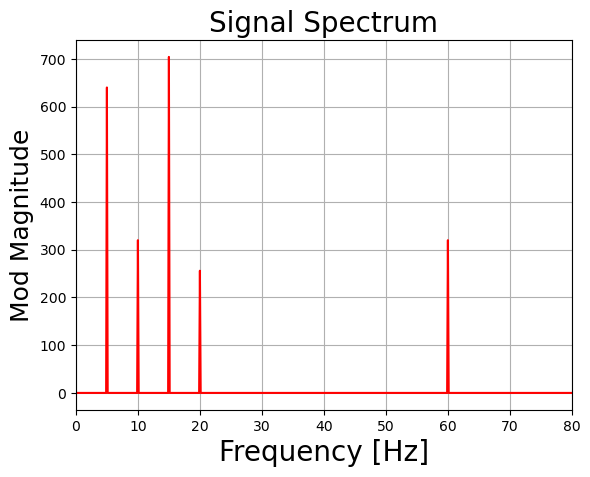

In [80]:
plt.plot(f, np.abs(fft(x_signal)),  color='r',)
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.xlim([0, fs/2])
plt.ylabel('Mod Magnitude', fontsize=18)
plt.title('Signal Spectrum', fontsize=20)
plt.subplots_adjust(hspace=0.5)
plt.grid()
plt.show()

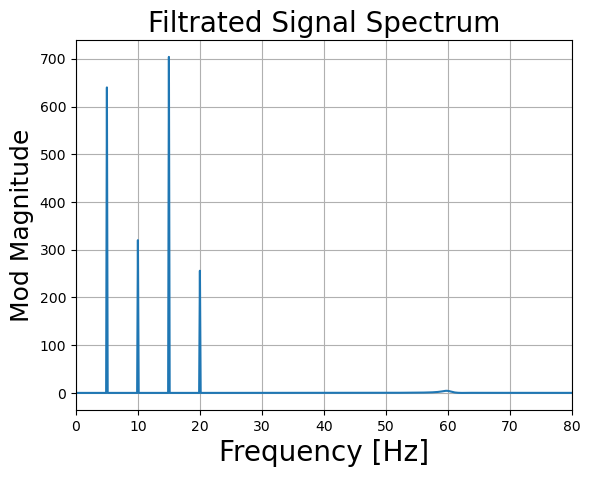

In [81]:
plt.plot(f, np.abs(fft(signal_filtered)))
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.xlim([0, fs/2])
plt.ylabel('Mod Magnitude', fontsize=18)
plt.title('Filtrated Signal Spectrum', fontsize=20)
plt.subplots_adjust(hspace=0.5)
plt.grid()
plt.show()